The dataset is about sales based on the different advertising channels like TV, Newspaper and Radio and we have to predict the future sales.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv")

In [3]:
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


# Features

1. TV
2. radio
3. newspaper

In [4]:
df.shape

(200, 5)

There are 200 rows and 5 columns in our dataset

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


from the above output we can see that all the columns in dataset are of float data type and also there are no missing values in our dataset

In [8]:
df.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


There is huge spending on TV advertisement on an average 147,000 dollars and minimum on radio of 23,000 dollars

Text(0.5, 1.0, 'sales vs radio')

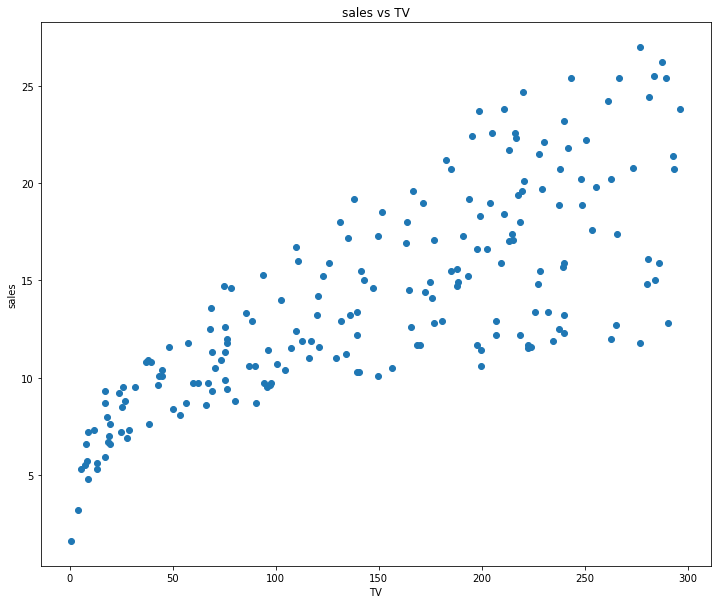

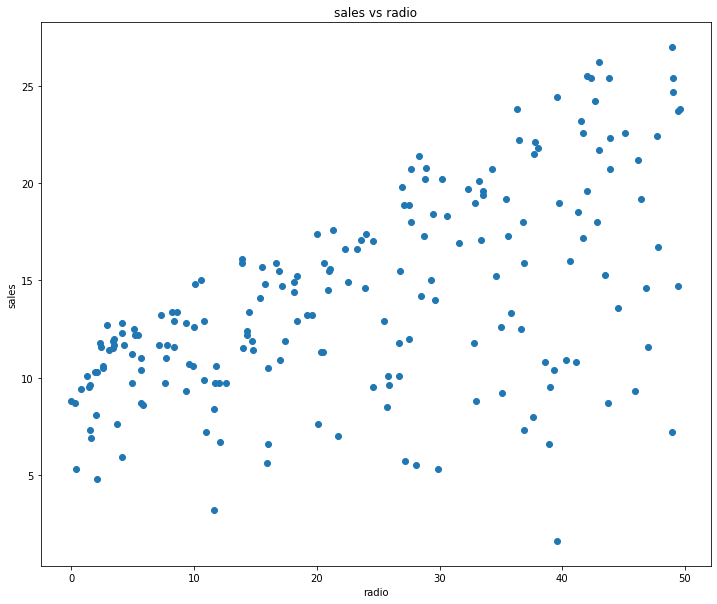

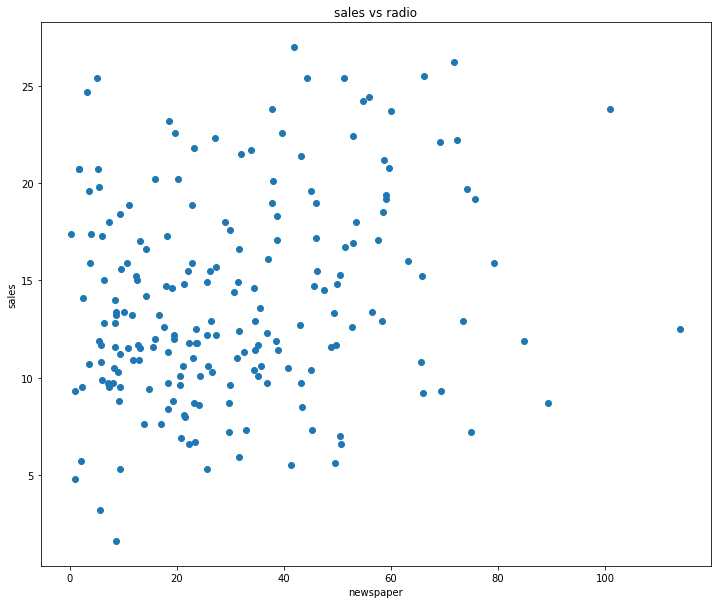

In [9]:
### Visualize the relationship using scatterplot

ax = plt.subplots(figsize=(12, 10))
plt.scatter(df["TV"], df["sales"])
plt.xlabel("TV")
plt.ylabel("sales")
plt.title("sales vs TV")

ax = plt.subplots(figsize=(12, 10))
plt.scatter(df["radio"], df["sales"])
plt.xlabel("radio")
plt.ylabel("sales")
plt.title("sales vs radio")

ax = plt.subplots(figsize=(12, 10))
plt.scatter(df["newspaper"], df["sales"])
plt.xlabel("newspaper")
plt.ylabel("sales")
plt.title("sales vs radio")

We can see that the relationship between Sales and TV is more linear.

Text(0.5, 1.0, 'newspaper vs TV')

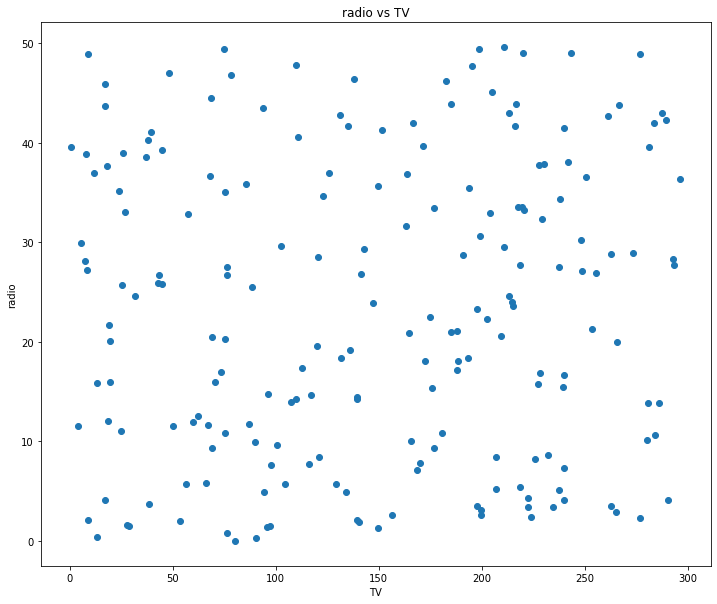

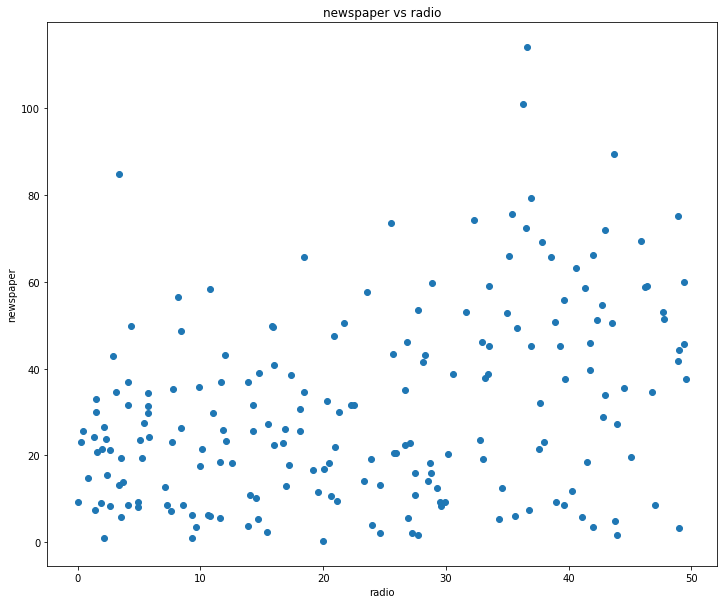

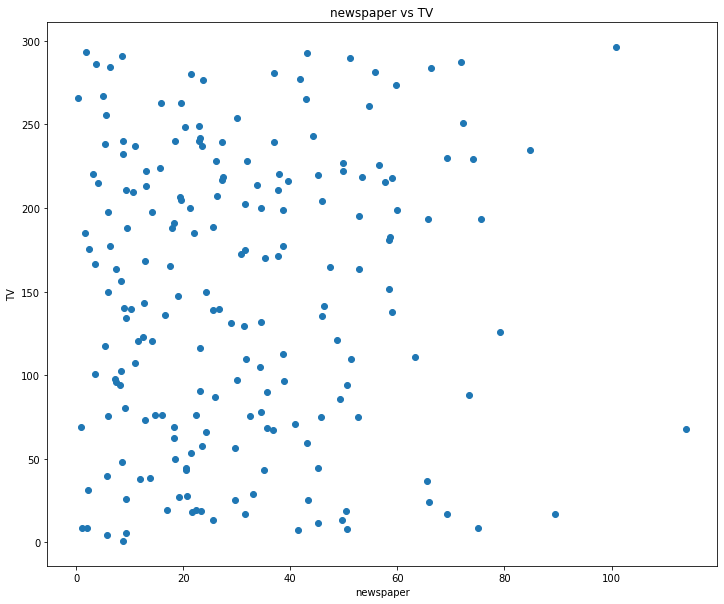

In [10]:
### Visualize the relationship using scatterplot

ax = plt.subplots(figsize=(12, 10))
plt.scatter(df["TV"], df["radio"])
plt.xlabel("TV")
plt.ylabel("radio")
plt.title("radio vs TV")

ax = plt.subplots(figsize=(12, 10))
plt.scatter(df["radio"], df["newspaper"])
plt.xlabel("radio")
plt.ylabel("newspaper")
plt.title("newspaper vs radio")

ax = plt.subplots(figsize=(12, 10))
plt.scatter(df["newspaper"], df["TV"])
plt.xlabel("newspaper")
plt.ylabel("TV")
plt.title("newspaper vs TV")

It seems there's no clear linear relationships between the predictors.

At this point, we know that the variable TV will more likely give better prediction of Sales because of the high correlation and linearity of the two.

# Checking for Outliers

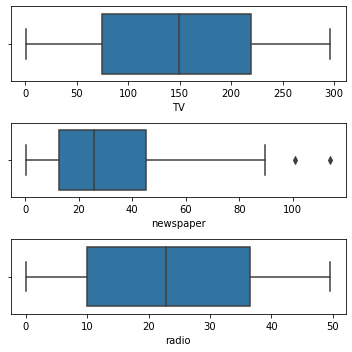

In [11]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

It shows that there are no considerable outliers present in our dataset.

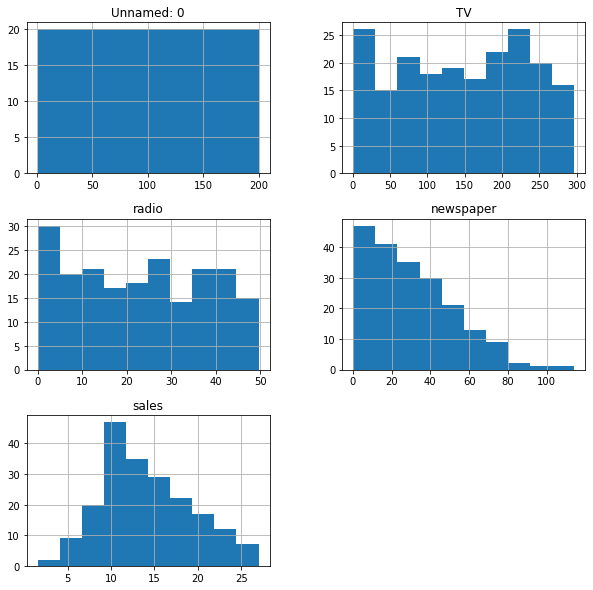

In [12]:
# to check all variables at once

df.hist( bins = 10, figsize = (10,10))
plt.show()

Spending budget for advertisments on TV is in all range, same for Radio but less than TV. But on newspapers, less budget is spend

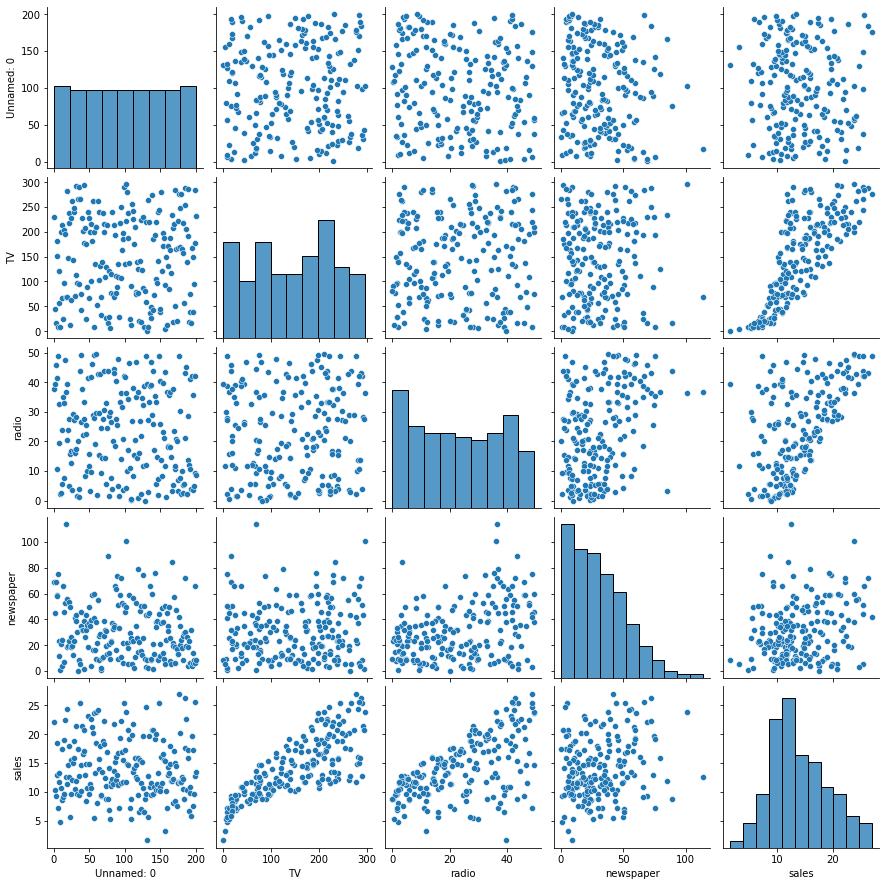

In [13]:
sns.pairplot(df, size=2.5)
plt.show()

Target Sales is directly correlated with TV, little with Radio but there is no correlation with Newspaper.
There is no correlation seems between all features. Hence no Multi-Collinearity

In [14]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [80]:
df.corr()['sales'].sort_values()

Unnamed: 0   -0.051616
newspaper     0.228299
radio         0.576223
TV            0.782224
sales         1.000000
Name: sales, dtype: float64

In [ ]:
The feature 'newspaper' has only 22% correlation with sales.
The feature 'radio' has 57% correlation with sales.
The feature 'TV' has maximum i.e. 78% correlation with sales.

<AxesSubplot:>

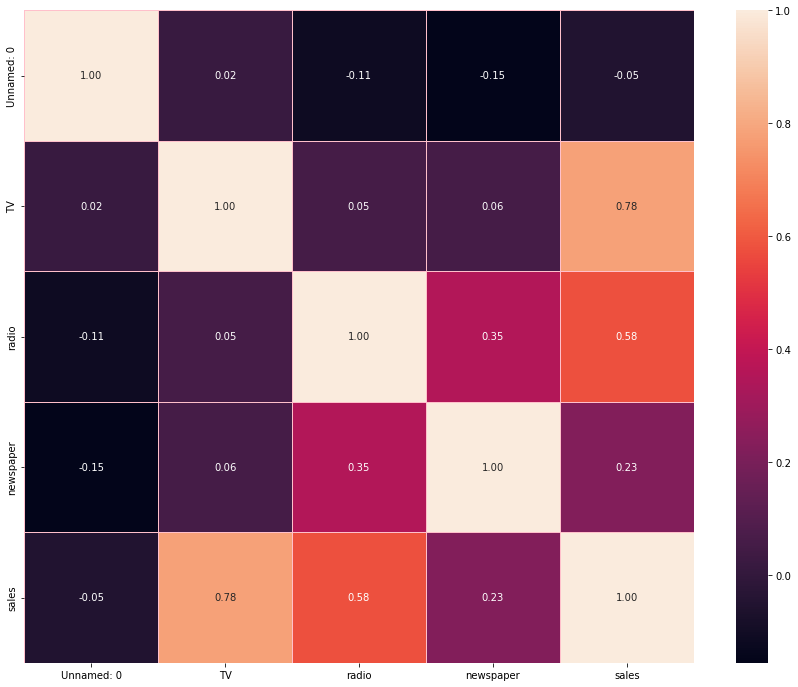

In [15]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
plt.figure(figsize=(15,12))
sns.heatmap(corr,  annot=True,linewidth = 0.5,linecolor='pink', fmt=".2f")

In [81]:
df.drop("Unnamed: 0",axis = 1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


# Prep the Data for Modelling

In [82]:
### Separate the predictor and the target variable 
x = df.drop("sales", axis = 1)
y = df["sales"]

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
### Train-Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

In [85]:
### Initialize dataframe that will store the results
df_results = pd.DataFrame(columns = ["Predictor/s", "R2", "MAE", "MSE", "RMSE", "Cross-Val Mean"])

# Model Building and Evaluation

# Linear Regression

In [86]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score

In [87]:
### Make a function for Linear Regression with default values
def linreg_model(xtrain, xtest):
    ### Initialize algorithm
    linreg = LinearRegression()

    ### Fit the data
    linreg.fit(xtrain, y_train)
    
    ### Evaluate the model
    y_pred = linreg.predict(xtest)
    
    print("R2:", r2_score(y_pred, y_test))
    print("MAE:", mean_absolute_error(y_pred, y_test))
    print("MSE:", mean_squared_error(y_pred, y_test))
    print("RMSE:", np.sqrt(mean_squared_error(y_pred, y_test)))
    
    f, ax = plt.subplots(figsize=(11, 9))
    plt.scatter(y_pred, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred, y_test) * 100, "MAE": mean_absolute_error(y_pred, y_test), 
            "MSE": mean_squared_error(y_pred, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred, y_test))}

# Using all predictors

The results of the model that uses all of the predictor variable will be our basis for the next models.

R2: 0.8832447395846404
MAE: 1.4082743919668723
MSE: 2.904139272675717
RMSE: 1.7041535355347877
Cross-Val Results: [0.87074153 0.84929412 0.92990198 0.88982108 0.93148951 0.93118906
 0.75841122 0.91195192 0.83320962 0.91898728]
Cross-Val Mean: 0.8824997330280174


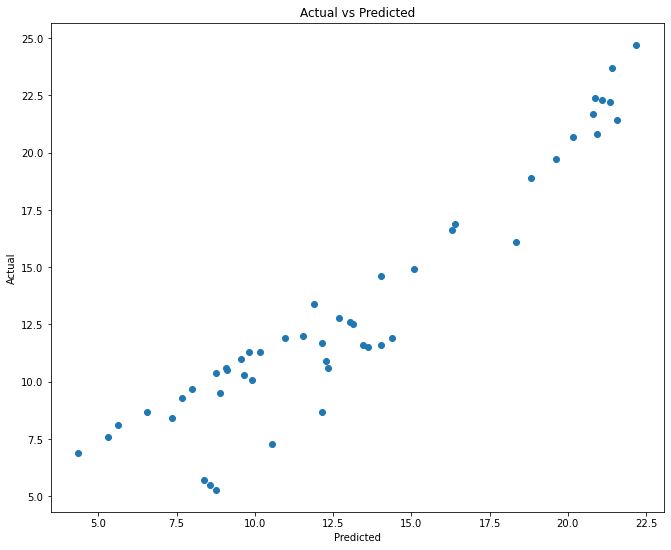

In [88]:
### Predict and get results
linreg_all_results = linreg_model(x_train, x_test)

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x, y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_all_results, ignore_index=True)

# Using only one predictor TV 

Since TV shows more correlation and linearity with our target variable, let's try predicting Sales using only this variable.

R2: 0.4310048090294476
MAE: 2.2737705943708724
MSE: 9.179298570399792
RMSE: 3.029735726164873
Cross-Val Results: [0.70015158 0.43449405 0.58322591 0.78975123 0.47952235 0.62298657
 0.66525353 0.60389703 0.16530872 0.64237498]
Cross-Val Mean: 0.5686965937483904


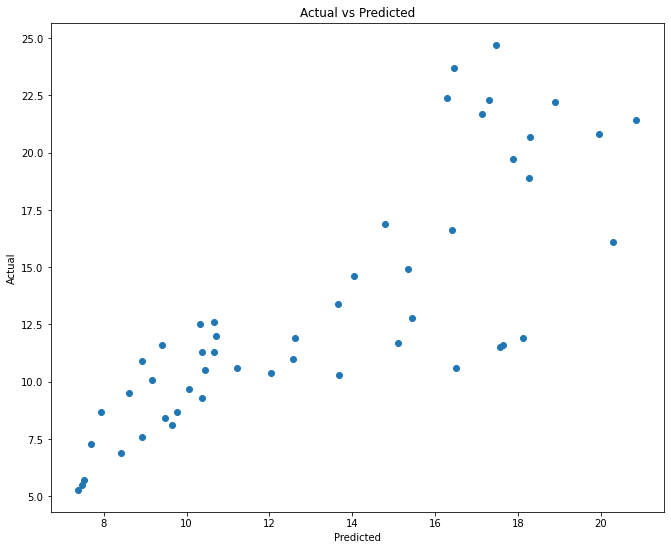

In [89]:
### Predict and get results
linreg_TV_results = linreg_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_TV_results, ignore_index=True)

Eventhough TV is more correlated and linear on Sales, this model does not perform well compared to the model that uses all predictors.

In [ ]:
Using top 2 predictors TV and Radio

The top 2 predictor variables based on the EDA above are TV and Radio, so let's see if the combination of these variables makes a better model.

R2: 0.8850764340201793
MAE: 1.3886802126434383
MSE: 2.8539947557761023
RMSE: 1.6893770318599997
Cross-Val Results: [0.87936561 0.85860496 0.92960574 0.89040105 0.93302554 0.93129743
 0.76486772 0.91373255 0.83925519 0.92951475]
Cross-Val Mean: 0.8869670516810129


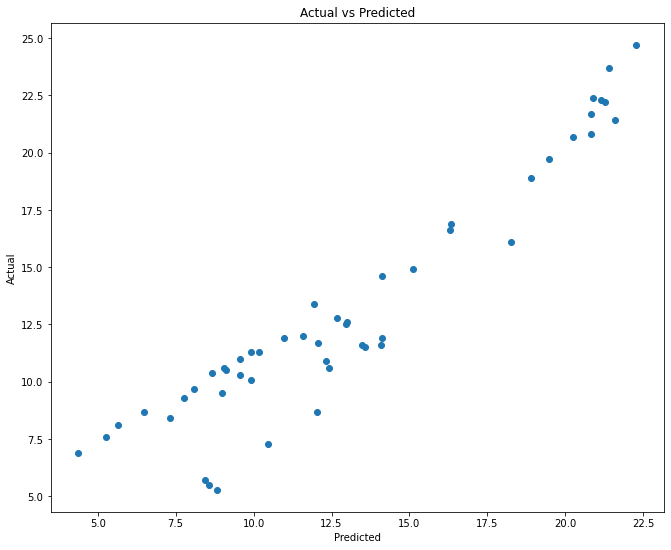

In [90]:
linreg_TVR_results = linreg_model(x_train[["TV", "radio"]], x_test[["TV", "radio"]])

### Cross Validation
cv_score = cross_val_score(LinearRegression(), x[["TV", "radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
linreg_TVR_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(linreg_TVR_results, ignore_index=True)

This model is slightly better than the model that uses all of the predictor variables.

# Lasso

In [91]:
from sklearn.linear_model import Lasso

In [92]:
### Make a function for Lasso Regression with default values
def lasso_model(x_train, x_test):
    ### Initialize algorithm
    lasreg = Lasso(alpha=1)

    ### Fit the data
    lasreg.fit(x_train, y_train)
    
    ### Evaluate the model
    y_pred2 = lasreg.predict(x_test)
    
    print("R2_lasso:", r2_score(y_pred2, y_test))
    print("MAE_lasso:", mean_absolute_error(y_pred2, y_test))
    print("MSE_lasso:", mean_squared_error(y_pred2, y_test))
    print("RMSE_lasso:", np.sqrt(mean_squared_error(y_pred2, y_test)))
    
    f, ax = plt.subplots(figsize=(12, 10))
    plt.scatter(y_pred2, y_test)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Actual vs Predicted")
    
    return {"R2": r2_score(y_pred2, y_test) * 100, "MAE": mean_absolute_error(y_pred2, y_test), 
            "MSE": mean_squared_error(y_pred2, y_test), "RMSE": np.sqrt(mean_squared_error(y_pred2, y_test))}

R2_lasso: 0.8832573541139187
MAE_lasso: 1.3901665408466772
MSE_lasso: 2.845269736277554
RMSE_lasso: 1.6867927366092
Cross-Val Results_lasso: [0.87711456 0.84881868 0.92626672 0.89397036 0.93230232 0.93186705
 0.76657199 0.91319658 0.82954877 0.92113299]
Cross-Val Mean_lasso: 0.8840790047457696


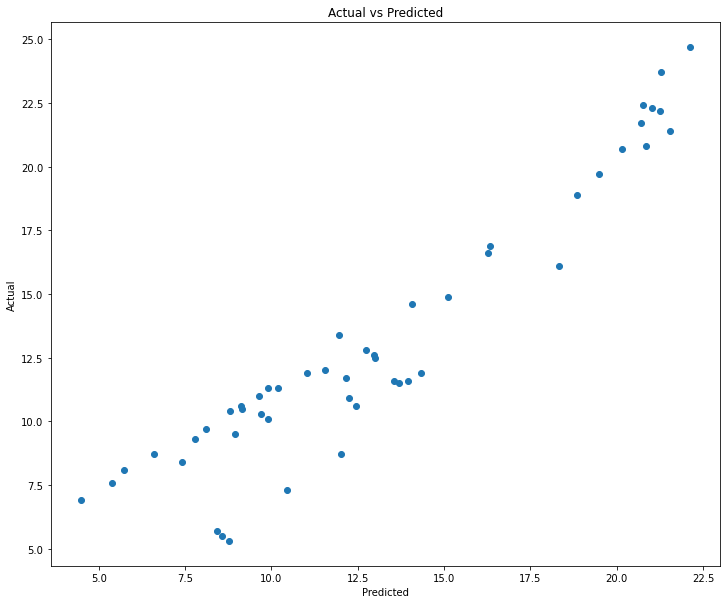

In [93]:
### Predict and get results
lasreg_all_results = lasso_model(x_train, x_test)

### Cross Validation
cv_score = cross_val_score(Lasso(alpha=1), x, y, cv=10)

print("Cross-Val Results_lasso:", cv_score)
print("Cross-Val Mean_lasso:", cv_score.mean())

### Compile validation results
lasreg_all_results.update({"Predictor/s":"All", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(lasreg_all_results, ignore_index=True)

R2_lasso: 0.42727819494631547
MAE_lasso: 2.2763028819987174
MSE_lasso: 9.184720380932752
RMSE_lasso: 3.0306303603265037
Cross-Val Results: [0.6998399  0.43598703 0.5823988  0.78917031 0.47962009 0.62320132
 0.66498585 0.6037686  0.16727975 0.64199545]
Cross-Val Mean: 0.5688247105512569


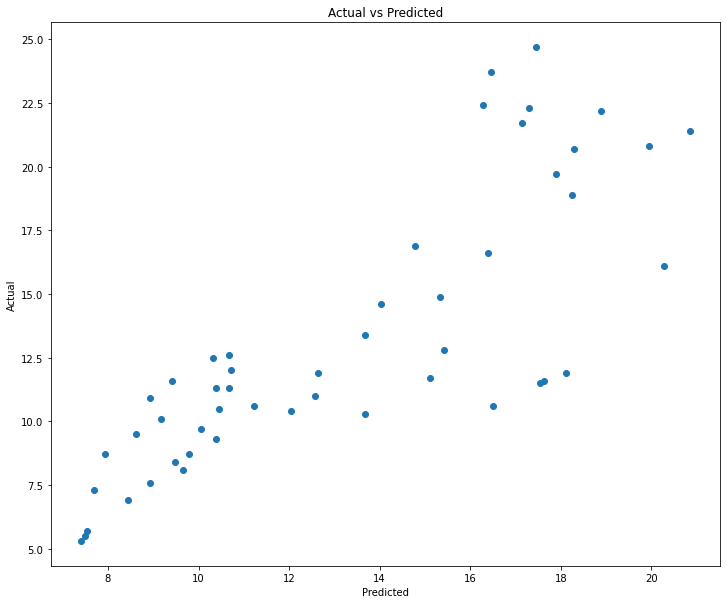

In [94]:
### Predict and get results
las_TV_results = lasso_model(x_train["TV"].values.reshape(-1,1), x_test["TV"].values.reshape(-1,1))

### Cross Validation
cv_score = cross_val_score(Lasso(alpha=1), x["TV"].values.reshape(-1, 1), y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
las_TV_results.update({"Predictor/s":"TV", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(las_TV_results, ignore_index=True)

R2_lasso: 0.8840949649872837
MAE_lasso: 1.3806615732103966
MSE_lasso: 2.822494155055864
RMSE_lasso: 1.6800280221043529
Cross-Val Results: [0.88226465 0.8562148  0.92626336 0.89397033 0.93222581 0.93204766
 0.76786853 0.91321879 0.83237401 0.9294574 ]
Cross-Val Mean: 0.8865905352352546


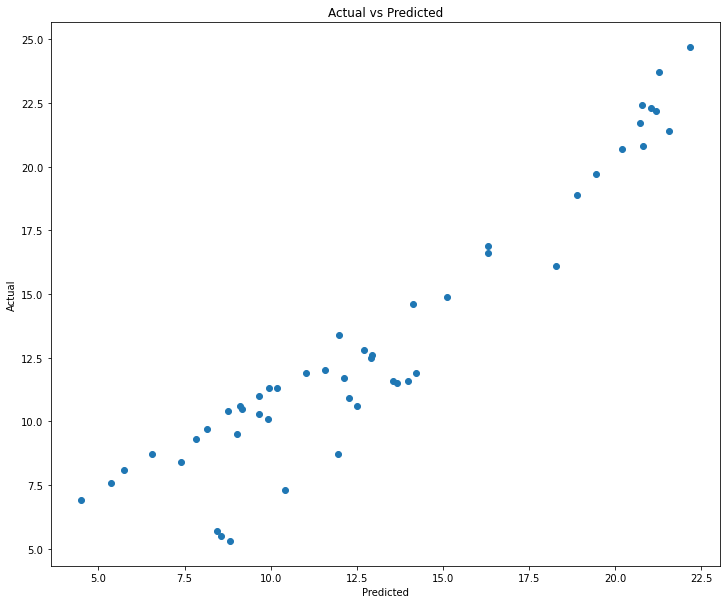

In [95]:
lasreg_TVR_results = lasso_model(x_train[["TV", "radio"]], x_test[["TV", "radio"]])

### Cross Validation
cv_score = cross_val_score(Lasso(alpha=1), x[["TV", "radio"]], y, cv=10)

print("Cross-Val Results:", cv_score)
print("Cross-Val Mean:", cv_score.mean())

### Compile validation results
las_TV_results.update({"Predictor/s":"TV & Radio", "Cross-Val Mean": cv_score.mean() * 100})

### Add the results to the dataframe
df_results = df_results.append(las_TV_results, ignore_index=True)

In [96]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [97]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

# Define Ridge Regression Model

In [98]:
# define model
model = Ridge()
model.fit(x_train,y_train)

Ridge()

In [99]:
y_pred3 = model.predict(x_test)

# Evaluating the model

In [100]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(y_test,y_pred3))

0.8926256449677588


# Hyperparameter Tuning

In [101]:
#define parameters

param = {
    'alpha':[.0001, 0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [102]:
#define model
model = Ridge()

# define search
search = GridSearchCV(model, param, scoring='r2', n_jobs=-1, cv=cv)

# execute search
result = search.fit(x, y)

# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8841325284301272
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'sparse_cg'}


Here are the results from GridSearchCV.

Best Score: 0.7116246167987581 
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'lsqr'}

Now input these best parameters into Ridge regression model and see the output once again.

In [103]:
model = Ridge(alpha=0.01,fit_intercept= True, normalize = True, solver ='lsqr')
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
print(r2_score(y_test,y_pred))

0.892619862624684


In [104]:
df_results.set_index("Predictor/s", inplace = True)
df_results.head()

,R2,MAE,MSE,RMSE,Cross-Val Mean
Predictor/s,,,,,
All,88.324474,1.408274,2.904139,1.704154,88.249973
TV,43.100481,2.273771,9.179299,3.029736,56.869659
TV & Radio,88.507643,1.38868,2.853995,1.689377,88.696705
All,88.325735,1.390167,2.84527,1.686793,88.4079
TV,42.727819,2.276303,9.18472,3.03063,56.882471




The Linear Regression model that uses the predictors TV and Radio performs the best out of all the models tried.

These results mean that advertising on TV and Radio contribute the most in Sales, and Newspaper advertisements have little effect in Sales.

Based on these findings, it is recommended that the marketer or the business owner shall allocate more budget on TV and Radio advertisements rather than Newspaper.


# Model Saving

In [105]:
import pickle

In [79]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

# some time later...

# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.892619862624684
